In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('Synthetic_Nigerian_ED_Triage_Data.xlsx')
df.head()

,age,sex,mode_of_arrival,chief_complaint,active_bleeding,resp_rate,heart_rate,systolic_bp,diastolic_bp,temperature,oxygen_sat,AVPU_scale,pregnancy,Triage_Category
0,58,Male,Walk-in,Chest pain,No,25,103,136,99,37.9,89,Voice,No,emergency
1,24,Male,Private vehicle,Psychiatric/behavioral emergency,No,25,107,125,93,37.8,88,Alert,No,emergency
2,50,Male,Ambulance,Weakness or fatigue,No,24,80,112,86,37.6,90,Pain,No,emergency
3,32,Female,Walk-in,Pregnancy-related complication,Yes,18,88,139,88,38.0,85,Unresponsive,Yes,emergency
4,45,Female,Private vehicle,Abdominal pain,No,20,101,118,92,37.8,89,Alert,No,emergency


In [ ]:
triage = df.copy()
triage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              600 non-null    int64  
 1   sex              600 non-null    object 
 2   mode_of_arrival  600 non-null    object 
 3   chief_complaint  600 non-null    object 
 4   active_bleeding  600 non-null    object 
 5   resp_rate        600 non-null    int64  
 6   heart_rate       600 non-null    int64  
 7   systolic_bp      600 non-null    int64  
 8   diastolic_bp     600 non-null    int64  
 9   temperature      600 non-null    float64
 10  oxygen_sat       600 non-null    int64  
 11  AVPU_scale       600 non-null    object 
 12  pregnancy        600 non-null    object 
 13  Triage_Category  600 non-null    object 
dtypes: float64(1), int64(6), object(7)
memory usage: 65.8+ KB


In [ ]:
triage.describe()

,age,resp_rate,heart_rate,systolic_bp,diastolic_bp,temperature,oxygen_sat
count,600.000000,600.000000,600.000000,600.00000,600.000000,600.00000,600.000000
mean,50.545000,18.680000,85.471667,121.98500,81.600000,37.52750,94.131667
std,17.471885,3.917462,13.207192,9.13147,8.107376,0.54671,3.853017
min,18.000000,12.000000,60.000000,104.00000,62.000000,36.40000,81.000000
25%,36.000000,16.000000,75.000000,115.00000,75.000000,37.10000,92.000000
50%,50.000000,18.000000,84.000000,120.00000,81.000000,37.50000,95.000000
75%,65.000000,21.000000,95.000000,128.00000,87.000000,37.90000,97.000000
max,80.000000,27.000000,116.000000,154.00000,103.000000,39.20000,100.000000


In [ ]:
triage.describe(include=['object', 'category'])

,sex,mode_of_arrival,chief_complaint,active_bleeding,AVPU_scale,pregnancy,Triage_Category
count,600,600,600,600,600,600,600
unique,2,3,12,2,4,2,3
top,Male,Private vehicle,Difficulty breathing,No,Alert,No,emergency
freq,307,249,68,499,351,539,200


In [ ]:
numeric_cols = triage.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = triage.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_cols.remove('Triage_Category')

/tmp/ipython-input-657366892.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


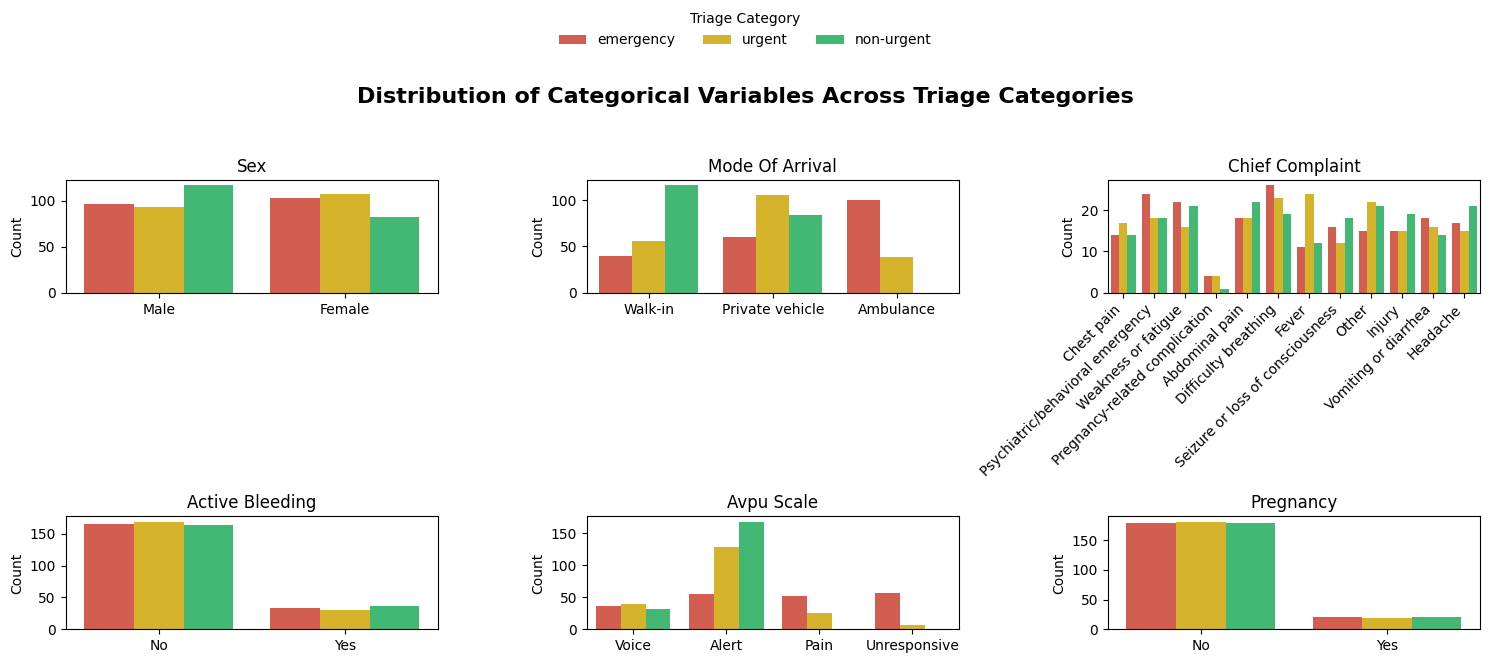

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define the triage color scheme (consistent across all figures)
triage_palette = {
    'emergency': '#E74C3C',   # red
    'urgent': '#F1C40F',      # yellow
    'non-urgent': '#2ECC71'   # green
}

# Create subplots (adjust layout to fit your number of categorical vars)
fig, axes = plt.subplots(2, 3, figsize=(15, 7))

# # List of categorical variables to plot
# categorical_vars = ['sex', 'mode_of_arrival', 'chief_complaint',
#                     'active_bleeding', 'AVPU_scale', 'pregnancy']

# Iterate over variables and axes
for ax, var in zip(axes.flat, categorical_cols):
    sns.countplot(
        data=df,
        x=var,
        hue='Triage_Category',
        hue_order=['emergency', 'urgent', 'non-urgent'],
        palette=triage_palette,
        ax=ax
    )
    ax.set_title(var.replace('_', ' ').title())
    ax.legend_.remove()  # remove individual legends
    ax.set_xlabel(None)
    ax.set_ylabel('Count')

    # Rotate long x labels (useful for 'chief_complaint')
    if var == 'chief_complaint':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_xlabel(None)

# Add a shared legend
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='upper center',
    ncol=3,
    title='Triage Category',
    frameon=False
)

# Add a main title for the entire figure
fig.suptitle(
    '\n\n\nDistribution of Categorical Variables Across Triage Categories',
    fontsize=16, fontweight='bold'
)

# Adjust layout to make space for the legend and title
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

plt.show()

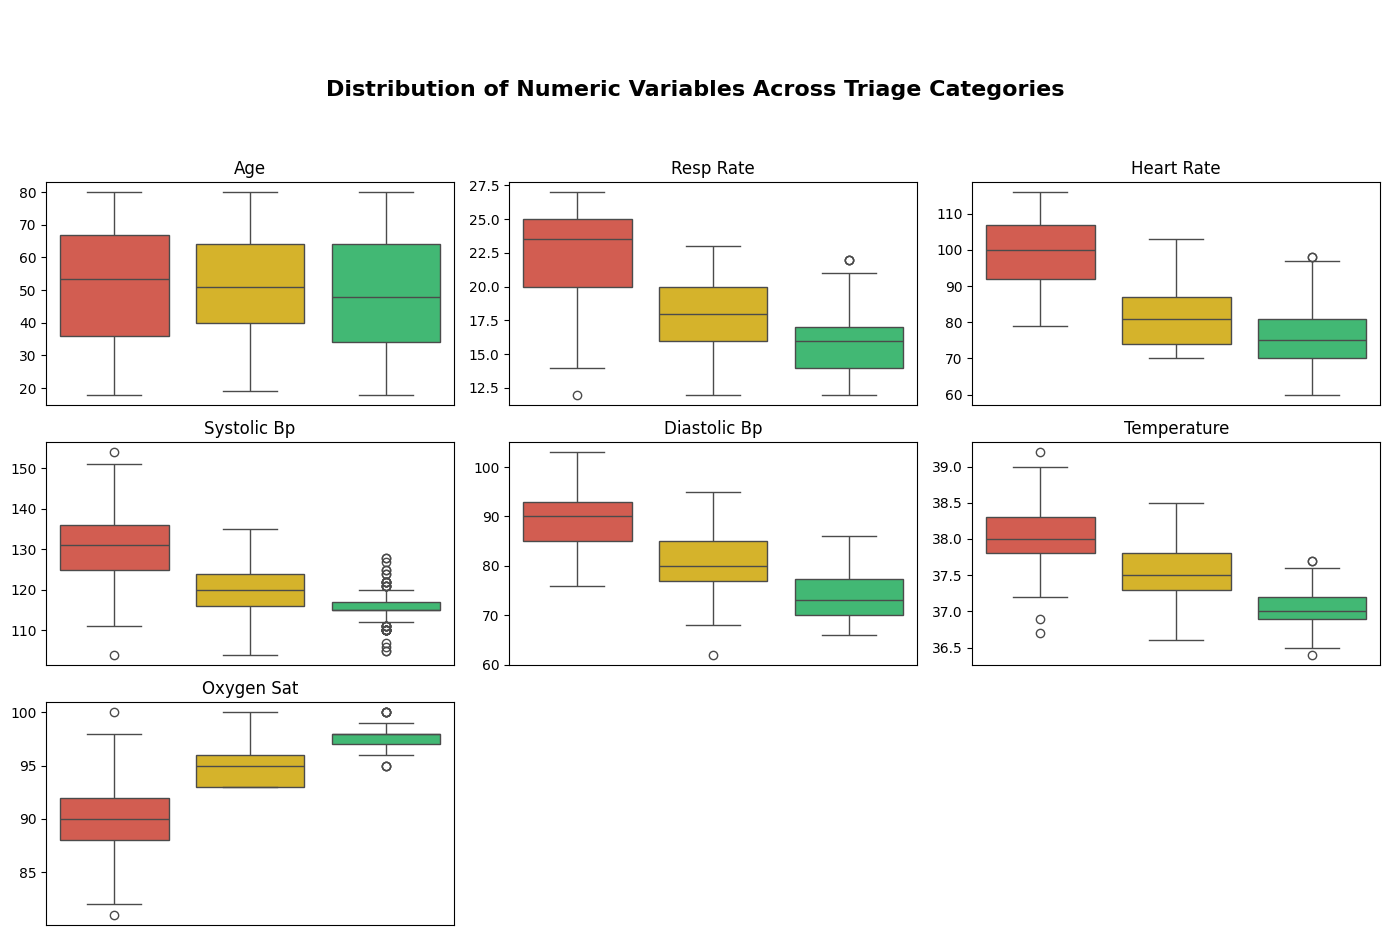

In [ ]:
# Create subplots grid (adjust rows/cols as needed)
fig, axes = plt.subplots(3, 3, figsize=(14, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each numeric variable
for ax, var in zip(axes, numeric_cols):
    sns.boxplot(
        data=df,
        x='Triage_Category',
        y=var,
        hue='Triage_Category',
        hue_order=['emergency', 'urgent', 'non-urgent'],
        palette=triage_palette,
        ax=ax
    )
    ax.set_title(var.replace('_', ' ').title())
    # ax.legend_.remove()
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticklabels([])
    ax.tick_params(bottom=False)

# Remove unused subplots if grid > variables
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

# Add a shared legend
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(
#     handles, labels,
#     loc='upper center',
#     ncol=3,
#     title='Triage Category',
#     frameon=False
# )

# Add a main title for the entire figure
fig.suptitle(
    '\n\n\nDistribution of Numeric Variables Across Triage Categories',
    fontsize=16, fontweight='bold'
)

# Adjust layout to make space for the legend and title
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

plt.show()

In [ ]:
# binary encoding
triage["sex"] = np.where(df["sex"] == "Female", 1, 0)
triage["pregnancy"] = df["pregnancy"].map({"No": 0, "Yes": 1})
triage["active_bleeding"] = np.where(df["active_bleeding"] == "Yes", 1, 0)  #chages yes to 1 and no to 0
triage.head()

,age,sex,mode_of_arrival,chief_complaint,active_bleeding,resp_rate,heart_rate,systolic_bp,diastolic_bp,temperature,oxygen_sat,AVPU_scale,pregnancy,Triage_Category
0,58,0,Walk-in,Chest pain,0,25,103,136,99,37.9,89,Voice,0,emergency
1,24,0,Private vehicle,Psychiatric/behavioral emergency,0,25,107,125,93,37.8,88,Alert,0,emergency
2,50,0,Ambulance,Weakness or fatigue,0,24,80,112,86,37.6,90,Pain,0,emergency
3,32,1,Walk-in,Pregnancy-related complication,1,18,88,139,88,38.0,85,Unresponsive,1,emergency
4,45,1,Private vehicle,Abdominal pain,0,20,101,118,92,37.8,89,Alert,0,emergency


In [ ]:
# One-hot encode all categorical variables except the target
categorical_cols = triage.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_cols.remove('Triage_Category')

# One-hot encode using pandas.get_dummies
df_encoded = pd.get_dummies(triage, columns=categorical_cols)
reference_cols = ['mode_of_arrival_Ambulance', 'chief_complaint_Other', 'AVPU_scale_Alert', 'Triage_Category']
triage_encoded = df_encoded.drop(columns=reference_cols, axis=1).astype(int)

# label encode the target variable
triage_encoded['Triage_Category'] = triage['Triage_Category'].map({'emergency': 0, 'urgent': 1, 'non-urgent': 2})
triage_encoded.head()

,age,sex,active_bleeding,resp_rate,heart_rate,systolic_bp,diastolic_bp,temperature,oxygen_sat,pregnancy,...,chief_complaint_Injury,chief_complaint_Pregnancy-related complication,chief_complaint_Psychiatric/behavioral emergency,chief_complaint_Seizure or loss of consciousness,chief_complaint_Vomiting or diarrhea,chief_complaint_Weakness or fatigue,AVPU_scale_Pain,AVPU_scale_Unresponsive,AVPU_scale_Voice,Triage_Category
0,58,0,0,25,103,136,99,37,89,0,...,0,0,0,0,0,0,0,0,1,0
1,24,0,0,25,107,125,93,37,88,0,...,0,0,1,0,0,0,0,0,0,0
2,50,0,0,24,80,112,86,37,90,0,...,0,0,0,0,0,1,1,0,0,0
3,32,1,1,18,88,139,88,38,85,1,...,0,1,0,0,0,0,0,1,0,0
4,45,1,0,20,101,118,92,37,89,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
triage_encoded.columns

Index(['age', 'sex', 'active_bleeding', 'resp_rate', 'heart_rate',
       'systolic_bp', 'diastolic_bp', 'temperature', 'oxygen_sat', 'pregnancy',
       'mode_of_arrival_Private vehicle', 'mode_of_arrival_Walk-in',
       'chief_complaint_Abdominal pain', 'chief_complaint_Chest pain',
       'chief_complaint_Difficulty breathing', 'chief_complaint_Fever',
       'chief_complaint_Headache', 'chief_complaint_Injury',
       'chief_complaint_Pregnancy-related complication',
       'chief_complaint_Psychiatric/behavioral emergency',
       'chief_complaint_Seizure or loss of consciousness',
       'chief_complaint_Vomiting or diarrhea',
       'chief_complaint_Weakness or fatigue', 'AVPU_scale_Pain',
       'AVPU_scale_Unresponsive', 'AVPU_scale_Voice', 'Triage_Category'],
      dtype='object')

In [ ]:
triage_encoded.to_csv('triage_preprocessed.csv', index=False)